# Notebook 4 - Education Data based on Race
In this notebook we still explore the relation between GDP and Education; this time, however, instead of focusing on different counties, we look at the racial disparity in earnings and the percentage of people who attended college.

## Data Used
**GDP**: We conduct web-scraping on the [U.S. Department of Labor](https://www.dol.gov/agencies/ofccp/about/data/earnings/race-and-ethnicity) that provides us with a clear analysis of income per race per county. 

**EDUCATION**: We used data on education attainment by race by the already-used [U.S. Census Bureau](https://www.census.gov/data/tables/time-series/demo/educational-attainment/cps-historical-time-series.html) in the Excel .xlsx format.

In [1]:
#Required imports for the project
import requests # for api requests
import pandas as pd #tabular data

from bs4 import BeautifulSoup

In [4]:
# !! REMINDER TO TAKE API KEY OUT OF CODE BEFORE SUBMITTING !!
api_key = "07e7023663c44b8f1179b4918403f04506e6264b"

In [9]:
import pandas as pd

# Read in the data
edu_race = pd.read_excel('../data/edu_perc_race.xlsx')
edu_race

,Year,All people,White,"White alone, not Hispanic",Black,Asian,Hispanic (any race),White alone or in combination,"White alone or in combination, not Hispanic",Black alone or in combination,Asian alone or in combination
0,2022,37.7,37.9,41.8,27.6,59.3,20.9,37.8,41.7,27.8,58.8
1,2021,37.9,37.9,41.9,28.1,61.0,20.6,37.9,41.8,28.3,60.7
2,2020,37.5,37.5,41.3,27.8,61.1,20.8,37.4,41.2,28.1,60.3
3,2019,36.0,36.3,40.1,26.1,58.1,18.8,36.2,40.0,26.3,57.7
4,2018,35.0,35.2,38.8,25.2,56.5,18.3,35.1,38.7,25.4,56.0
5,2017,34.2,34.5,38.1,23.9,54.8,17.2,34.4,38.0,24.2,54.4
6,2016,33.4,33.7,37.3,23.3,55.9,16.4,33.6,37.2,23.5,55.4
7,2015,32.5,32.8,36.2,22.5,53.9,15.5,32.7,36.2,22.7,53.7
8,2014,32.0,32.3,35.6,22.2,52.3,15.2,32.2,35.5,22.7,52.2
9,2013,31.7,32.0,35.2,21.8,53.2,15.1,31.9,35.1,22.0,52.8


In [2]:
# Transform the Year column into datetime
edu_race['Year'] = pd.to_datetime(edu_race['Year'], format='%Y')

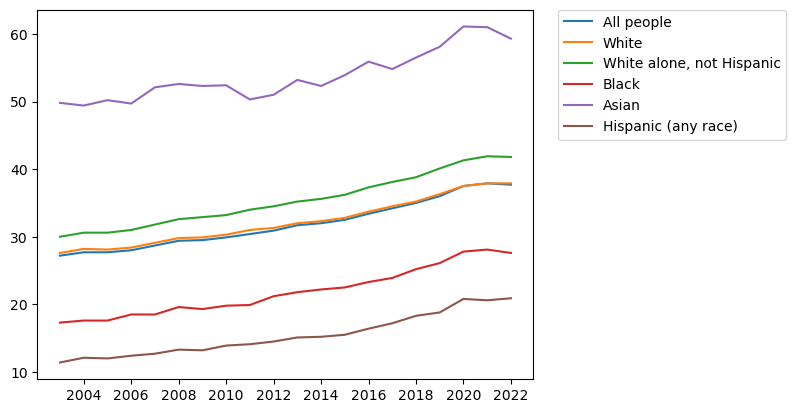

In [3]:
# Plot the data
import matplotlib.pyplot as plt

plt.plot(edu_race["Year"],edu_race["All people"], label="All people")
plt.plot(edu_race["Year"],edu_race["White"], label="White")
plt.plot(edu_race["Year"],edu_race["White alone, not Hispanic"], label="White alone, not Hispanic")
#replicate for the remaining columns
plt.plot(edu_race["Year"],edu_race["Black"], label="Black")
plt.plot(edu_race["Year"],edu_race["Asian"], label="Asian")
plt.plot(edu_race["Year"],edu_race["Hispanic (any race)"], label="Hispanic (any race)")
#show labels
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0) #This places the legend box outside the plot
plt.show()

The further education level of US Asians is neatly higher than the rest of the population. In the next steps we will verify if this is noticed also on their GDP.

The data from the GDP per race is from a three-year-period [spanning from 2017 to 2019](https://www.dol.gov/sites/dolgov/files/OFCCP/earnings/files/Earnings%20Disparity%20Data%20Methodology%2007-10-20%20508c.pdf). We will combine data from that years to notice any relevant correlation.

In [6]:
gdp_race = pd.read_excel('../data/gdp_per_race.xlsx')
gdp_race=gdp_race[gdp_race["State"]=="NATIONAL"]
gdp_race = gdp_race[~((gdp_race["Data Type"] == "Native American/American Indian") | (gdp_race["Data Type"] == "Multiracial"))]
gdp_race = gdp_race.rename(columns={"Data Type": "Race"})

gdp_race

,State,Race,Average Weekly Earnings,Number of Workers,Earnings Disparity,Employed Percent
0,NATIONAL,White,-,9.748495e+07,1.000000,0.626741
1,NATIONAL,Black,791.005786,1.778119e+07,0.755846,0.114317
3,NATIONAL,Asian-Pacific Islander,1168.821931,1.007128e+07,1.116869,0.064749
4,NATIONAL,Hispanic/Latino,762.795413,2.684918e+07,0.728890,0.172616


Looking at the national level, we can see there is a disparity between races. Returning to our original example, we will now see whether this difference is more nuanced when looking at California.

In [5]:
#Getting data on the ethnic composition of counties in California by looking at the population of 
#each counties of those who consider themselves to be white alone and not hispanic or latino from 
#the american community survey
url = "https://api.census.gov/data/2019/acs/acs5?get=B03002_003E&for=county:*&key={}".format(api_key)
response = requests.request("GET", url)

In [16]:
#creating a dataframe function
def json_to_dataframe(response):
    return pd.DataFrame(response.json()[1:], columns=response.json()[0])

In [24]:
#converting the json data into a pandas dataframe
white_county = json_to_dataframe(response)
df = pd.DataFrame(data = white_county)
df = df.rename(columns={'B03002_003E': 'County White Population'})

In [39]:
#Changing data types of the columns
df2['county'] = df2['county'].astype(int)
df2.dtypes

state                                               int64
county                                              int64
GEO_ID                                              int64
Number of Educational Institutions                float64
Percent of Population with a Bachelor's Degree    float64
GDP per Capita 2017                               float64
dtype: object

In [43]:
#Changing data types of the columns
df['county'] = df['county'].astype(int)
df['state'] = df['state'].astype(int)
df.dtypes

County White Population    object
state                       int64
county                      int64
dtype: object

In [48]:
#Merging it with the data on white population per county
merged_df = pd.merge(df, df2, on=['state', 'county'])
merged_df

,County White Population,state,county,GEO_ID,Number of Educational Institutions,Percent of Population with a Bachelor's Degree,GDP per Capita 2017
0,25049,17,107,17107,0.0,15.780000,35.799139
1,432361,17,97,17097,253.0,17.800000,83.330223
2,34459,18,69,18069,7.0,17.625000,35.041566
3,21572,18,181,18181,5.0,13.700000,37.041847
4,19773,18,75,18075,0.0,16.733333,41.939167
...,...,...,...,...,...,...,...
1388,47135,47,43,47043,4.0,17.255556,30.850802
1389,28185,47,79,47079,0.0,18.450000,35.453027
1390,379329,47,93,47093,86.0,18.900000,52.353073
1391,139090,53,5,53005,41.0,19.740909,53.341329
